In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import charset_normalizer
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reboot-student-stress-factors/ReBoot_Student_Stress_Factors.csv


# Student Stress Factors Analysis
# Authors: Laura Suárez and Manolo Castillo
# Objective: Analyze various factors affecting student stress and well-being


# Load dataset '/kaggle/input/reboot-student-stress-factors/ReBoot_Student_Stress_Factors.csv'

In [2]:
with open('/kaggle/input/reboot-student-stress-factors/ReBoot_Student_Stress_Factors.csv', 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
df = pd.read_csv('/kaggle/input/reboot-student-stress-factors/ReBoot_Student_Stress_Factors.csv', encoding='ascii')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,str_level
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,1
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,2
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,1
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,2
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,1


## Inspect the dataset

Student life can be stressful, with many factors influencing mental health and academic performance. The "ReBoot – Student Stress Factors" dataset offers insights into students' psychological, physiological, environmental, academic, and social experiences. In this analysis, we explore key variables to understand what contributes most to student stress and how different factors are connected.

- Use descriptive statistics to understand the distribution of numerical and categorical variables.

# Display basic information about the dataset

In [4]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,str_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [6]:
print(df.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
str_level                       0
dtype: int64


In [7]:
df.shape

(1100, 22)

## Data Cleaning

In [8]:
missing_values = df.isnull().sum()
missing_values

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
str_level                       0
dtype: int64

### Remove duplicates

In [9]:
duplicates = df.duplicated().sum()
duplicates

0

**No duplicated rows found**

In [10]:
compare_columns = df['stress_level'].equals(df['str_level'])
compare_columns

True

**Found 2 duplicated columns ('stress_level' & 'str_level') and proceed to drop 'str_level'**

In [11]:
df = df.drop('str_level', axis=1)

In [12]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

### Check unique values

In [13]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n\n")

anxiety_level: [14 15 12 16 20  4 17 13  6  5  9  2 11  7 21  3 18  0  8  1 19 10]


self_esteem: [20  8 18 12 28 13 26  3 22 15 23 21 25  1 27  5  6  9 29 30  4 19 16  2
  0 14  7 17 24 11 10]


mental_health_history: [0 1]


depression: [11 15 14  7 21  6 22 12 27 25  8 24  3  1  0  5 26 20 10  9  2 16  4 13
 18 23 17 19]


headache: [2 5 4 3 1 0]


blood_pressure: [1 3 2]


sleep_quality: [2 1 5 4 3 0]


breathing_problem: [4 2 3 1 5 0]


noise_level: [2 3 4 1 0 5]


living_conditions: [3 1 2 4 5 0]


safety: [3 2 4 1 5 0]


basic_needs: [2 3 1 4 5 0]


academic_performance: [3 1 2 4 5 0]


study_load: [2 4 3 5 1 0]


teacher_student_relationship: [3 1 2 4 5 0]


future_career_concerns: [3 5 2 4 1 0]


social_support: [2 1 3 0]


peer_pressure: [3 4 5 2 1 0]


extracurricular_activities: [3 5 2 4 0 1]


bullying: [2 5 1 4 3 0]


stress_level: [1 2 0]




## 1) Descriptive Statistics
## We calculate key statistics to understand overall characteristics of the students such as population size, average anxiety level, and how many students report a history of mental health issues.


### Number of students in the dataset


In [14]:
students_total = df.shape[0]
print(f"Total Students: {students_total}")

Total Students: 1100


### Average anxiety level

In [15]:
avg_anxiety = df['anxiety_level'].mean()
print(f"Average anxiety level: {avg_anxiety:.2f}")

Average anxiety level: 11.06


### Number of students with a mental health history

In [16]:
mental_health_count = df[df['mental_health_history'] == 1].shape[0]
print(f"Number of students with a mental health history: {mental_health_count}")

Number of students with a mental health history: 542


## 2) Psychological Factors
## Here we examine psychological indicators including self-esteem and depression. We identify how many students fall below average self-esteem and those possibly showing clinical levels of depression.


### Number of students with self-esteem below the average

In [17]:
below_avg_self_esteem = df[df['self_esteem'] < df['self_esteem'].mean()].shape[0]
print(f"Number of students with self-esteem below the average: {below_avg_self_esteem}")

Number of students with self-esteem below the average: 507


### Define threshold for clinical depression and count students beyond it


In [18]:
threshold = df['depression'].max() * 0.45

In [19]:
depressed_students = df[df['depression'] > threshold].shape[0]
total_students = df.shape[0]

percentage_depressed = (depressed_students / total_students) * 100
print(f"{percentage_depressed:.2f}% of students have depression levels above the clinical threshold of {threshold}.")

46.45% of students have depression levels above the clinical threshold of 12.15.


## 3) Physiological Factors
## We evaluate physical symptoms that might be stress-related, such as headaches and sleep quality. We also calculate the average blood pressure rating.


### Number of students who suffer from frequent headaches

In [20]:
frequent_headaches = df[df['headache'] >= 4].shape[0]
print(f"Number of students who suffer from frequent headaches: {frequent_headaches}")

Number of students who suffer from frequent headaches: 269


### Average blood pressure rating

In [21]:
mean_bp = df['blood_pressure'].mean()
print(f"Average blood pressure rating: {mean_bp:.2f}")

Average blood pressure rating: 2.18


### Number of students who rate their sleep quality as poor (1 or 2)

In [22]:
poor_sleep = df[df['sleep_quality'] <= 2].shape[0]

sleep_table = pd.DataFrame({
    'Category': ['Students with poor sleep quality (≤ 2)'],
    'Count': [poor_sleep]
})

print(sleep_table)

                                 Category  Count
0  Students with poor sleep quality (≤ 2)    550


## 4) Environmental Factors
## This section explores living conditions such as noise level, sense of safety, and access to basic needs to see how they might affect student stress.


### Students living in high noise environments

In [23]:
high_noise = df[df['noise_level'] >= 4].shape[0]
print(f"Students living in high noise environments: {high_noise}")

Students living in high noise environments: 274


### Percentage of students who feel unsafe

In [24]:
unsafe_students = df[df['safety'] <= 2].shape[0]
total_students = df.shape[0]
percent_unsafe = (unsafe_students / total_students) * 100
print(f"Percentage of students who feel unsafe: {percent_unsafe:.2f}")

Percentage of students who feel unsafe: 51.36


### Students with poor access to basic needs

In [25]:
low_basic_needs = df[df['basic_needs'] <= 2].shape[0]
print(f"Students with poor access to basic needs: {low_basic_needs}")

Students with poor access to basic needs: 548


In [26]:
env_table = pd.DataFrame({
    'Category': [
        'Students with high noise level (≥ 4)',
        'Students who feel unsafe (safety ≤ 2)',
        'Students with low access to basic needs (≤ 2)'
    ],
    'Count': [high_noise, unsafe_students, low_basic_needs],
    'Percentage': [
        f"{(high_noise / total_students) * 100:.2f}%",
        f"{percent_unsafe:.2f}%",
        f"{(low_basic_needs / total_students) * 100:.2f}%"
    ]
})

print(env_table)

                                        Category  Count Percentage
0           Students with high noise level (≥ 4)    274     24.91%
1          Students who feel unsafe (safety ≤ 2)    565     51.36%
2  Students with low access to basic needs (≤ 2)    548     49.82%


## 5) Academic Factors
## We analyze academic stress contributors such as performance perception, study hours, and concerns about future careers.

### Students who rate academic performance below average

In [27]:
low_performance = df[df['academic_performance'] < 3].shape[0]
print(f"Students who rate academic performance below average: {low_performance}")

Students who rate academic performance below average: 561


### Average number of study hours per week

In [28]:
avg_study_load = df['study_load'].mean()
print(f"Average number of study hours per week: {avg_study_load:.2f}")

Average number of study hours per week: 2.62


### Students with high career concerns

In [29]:
career_concerned = df[df['future_career_concerns'] >= 4].shape[0]
print(f"Students with high career concerns: {career_concerned}")

Students with high career concerns: 371


In [30]:
academic_table = pd.DataFrame({
    'Category': [
        'Students with academic performance < 3',
        'Average study load (hours/week)',
        'Students with career concerns ≥ 4'
    ],
    'Value': [
        low_performance,
        f"{avg_study_load:.2f}",
        career_concerned
    ],
    'Percentage': [
        f"{(low_performance / total_students) * 100:.2f}%",
        '',
        f"{(career_concerned / total_students) * 100:.2f}%"
    ]
})

print(academic_table)

                                 Category Value Percentage
0  Students with academic performance < 3   561     51.00%
1         Average study load (hours/week)  2.62           
2       Students with career concerns ≥ 4   371     33.73%


## 6) Social Factors
## We assess the social context including support systems, bullying experiences, and engagement in extracurricular activities.


### Students reporting high social support

In [31]:
high_social_support = df[df['social_support'] >= 4].shape[0]
print(f"Students reporting high social support: {high_social_support}")

Students reporting high social support: 0


### Percentage of students who experienced bullying

In [32]:
bullying_students = df[df['bullying'] >= 3].shape[0]
percent_bullying = (bullying_students / total_students) * 100
print(f"Percentage of students who experienced bullying: {percent_bullying:.2f}")

Percentage of students who experienced bullying: 50.82


### Students participating in extracurricular activities

In [33]:
extracurricular_participants = df[df['extracurricular_activities'] >= 1].shape[0]
print(f"Students participating in extracurricular activities: {extracurricular_participants}")

Students participating in extracurricular activities: 1066


In [34]:
social_table = pd.DataFrame({
    'Category': [
        'Students with high social support (≥ 4)',
        'Percentage experiencing bullying (≥ 3)',
        'Students participating in extracurricular activities (≥ 1)'
    ],
    'Value': [
        high_social_support,
        bullying_students / total_students,
        extracurricular_participants
    ],
    'Percentage': [
        f"{(high_social_support / total_students) * 100:.2f}%",
        f"{percent_bullying:.2f}%",
        f"{(extracurricular_participants / total_students) * 100:.2f}%"
    ]
})

print(social_table)

                                            Category        Value Percentage
0            Students with high social support (≥ 4)     0.000000      0.00%
1             Percentage experiencing bullying (≥ 3)     0.508182     50.82%
2  Students participating in extracurricular acti...  1066.000000     96.91%


## 7) Comparative Analysis
## We investigate relationships between key variables such as anxiety vs. academic performance and how sleep or bullying may relate to mental health and depression.


### Correlation between anxiety and academic performance

In [35]:
correlation = df['anxiety_level'].corr(df['academic_performance'])
print(f"Correlation between anxiety level and academic performance: {correlation:.2f}")

Correlation between anxiety level and academic performance: -0.65


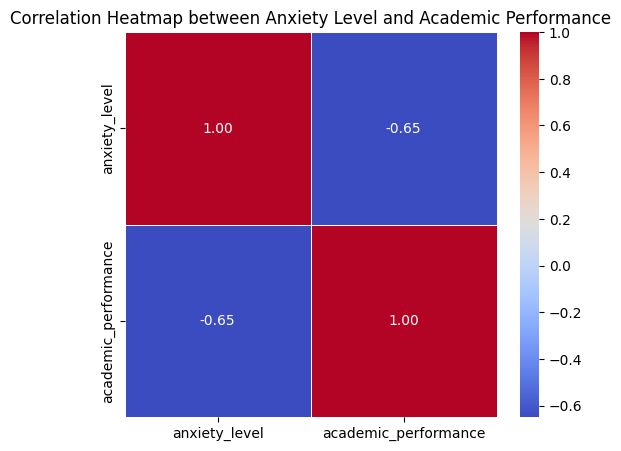

In [36]:
corr_value = df[['anxiety_level', 'academic_performance']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_value, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between Anxiety Level and Academic Performance")
plt.show()


### Depression levels in students with poor sleep

In [37]:
poor_sleep = df[df['sleep_quality'] <= 2]
avg_depression_poor_sleep = poor_sleep['depression'].mean()
print(f"Average depression score for students with poor sleep quality: {avg_depression_poor_sleep:.2f}")

Average depression score for students with poor sleep quality: 17.26


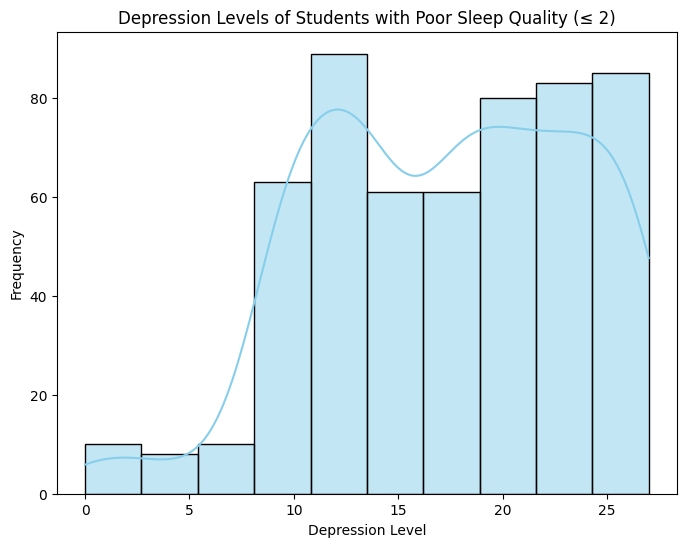

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(poor_sleep['depression'], bins=10, kde=True, color='skyblue')
plt.title("Depression Levels of Students with Poor Sleep Quality (≤ 2)")
plt.xlabel("Depression Level")
plt.ylabel("Frequency")
plt.show()

### Students who experienced bullying and have mental health history

In [39]:
bullying_grouped = df.groupby('bullying')['mental_health_history'].mean().reset_index()

# Convert to percentage
bullying_grouped['mental_health_history'] *= 100

fig = px.area(
    bullying_grouped,
    x='bullying',
    y='mental_health_history',
    title='Mental Health History by Bullying Level (Area Chart)',
    labels={
        'bullying': 'Bullying Level',
        'mental_health_history': 'Students with Mental Health History (%)'
    }
)
fig.update_layout(yaxis_range=[0, 100])
fig.show()

## 8) General Exploration
## We compute mean values across grouped factor variables to understand which domain tends to be most negatively impacted.


### Average values grouped by factor

In [40]:
factors = {
    "Psychological": ['anxiety_level', 'self_esteem', 'depression', 'mental_health_history'],
    "Physiological": ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    "Environmental": ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    "Academic": ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    "Social": ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}

factor_means = {}
for factor, variables in factors.items():
    factor_means[factor] = df[variables].mean().mean()  # Promedio de las variables dentro de cada factor

print(factor_means)



{'Psychological': 10.472272727272728, 'Physiological': 2.525909090909091, 'Environmental': 2.669318181818182, 'Academic': 2.6729545454545454, 'Social': 2.5002272727272725}


### Visualization of trends comparing factors

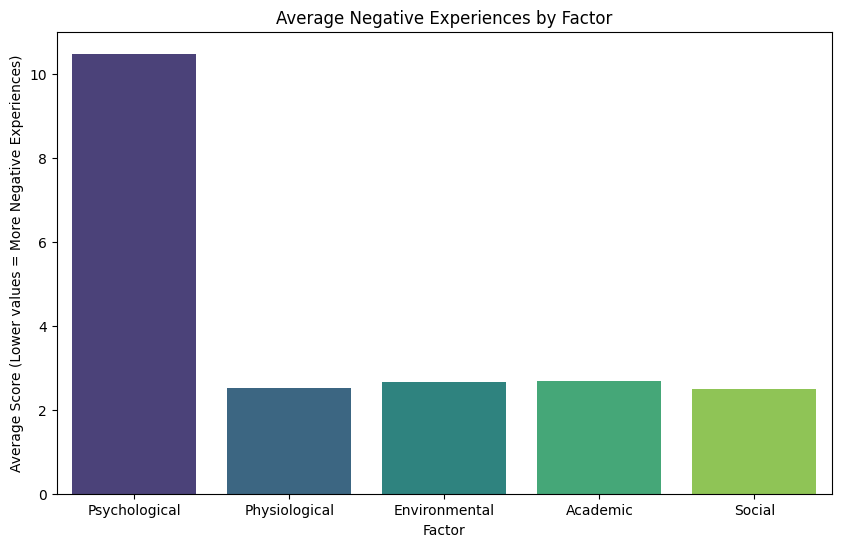

In [41]:
factor_labels = list(factor_means.keys())
factor_values = list(factor_means.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=factor_labels, y=factor_values, palette='viridis')
plt.title("Average Negative Experiences by Factor")
plt.xlabel("Factor")
plt.ylabel("Average Score (Lower values = More Negative Experiences)")
plt.show()

### Correlations with stress_level for each factor

In [42]:
factor_correlations = {}
for factor, variables in factors.items():
    correlations = df[variables].corrwith(df['stress_level'])  # Correlación con stress_level
    strongest_correlation_variable = correlations.idxmax()  # La variable con la correlación más alta
    strongest_correlation_value = correlations.max()  # El valor de la correlación
    factor_correlations[factor] = (strongest_correlation_variable, strongest_correlation_value)

for factor, (var, corr_val) in factor_correlations.items():
    print(f"Factor: {factor}, Most impactful variable: {var}, Correlation: {corr_val:.2f}")

Factor: Psychological, Most impactful variable: anxiety_level, Correlation: 0.74
Factor: Physiological, Most impactful variable: headache, Correlation: 0.71
Factor: Environmental, Most impactful variable: noise_level, Correlation: 0.66
Factor: Academic, Most impactful variable: future_career_concerns, Correlation: 0.74
Factor: Social, Most impactful variable: bullying, Correlation: 0.75


## Stress Level Analysis by Variables
## We group data by stress level to see how variables like depression, sleep, and bullying differ across stress intensity.


In [43]:
stress_comparison = df.groupby('stress_level')[['depression', 'sleep_quality', 'bullying']].mean()
print(stress_comparison)

              depression  sleep_quality  bullying
stress_level                                     
0               6.013405       4.126005  1.254692
1              11.874302       2.530726  2.555866
2              19.829268       1.303523  4.054201


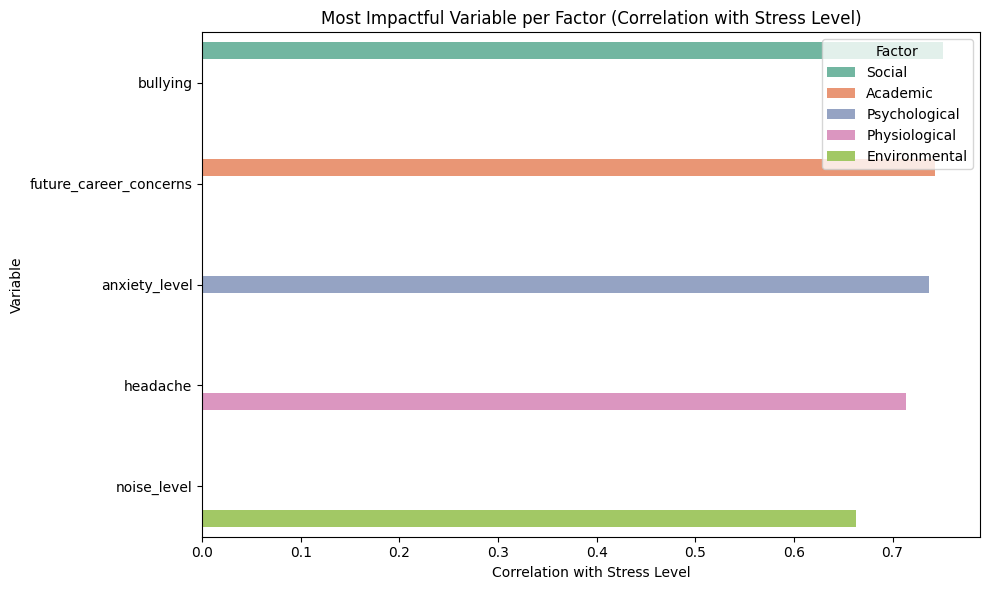

In [44]:
correlation_data = pd.DataFrame([
    {"Factor": factor, "Variable": var, "Correlation": corr_val}
    for factor, (var, corr_val) in factor_correlations.items()
])

correlation_data = correlation_data.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_data, x="Correlation", y="Variable", hue="Factor", palette="Set2")

plt.title("Most Impactful Variable per Factor (Correlation with Stress Level)")
plt.xlabel("Correlation with Stress Level")
plt.ylabel("Variable")
plt.legend(title="Factor")
plt.tight_layout()
plt.show()

# **Conclusion: Practical Insights from the Data Analysis**

After analyzing the dataset on student stress factors, we’ve gained valuable insights that can be applied to improve students' well-being and academic performance. Here's a summary of the key findings and their practical implications:

**1️⃣ Psychological Factors Matter the Most**
Through our analysis, we found that psychological factors like anxiety, depression, and self-esteem have the most significant impact on students' overall stress levels. It’s crucial to address these factors as part of any student well-being program. For instance:

**Mental health support:** Providing counseling services or mental health workshops to help students cope with anxiety and depression.

**Self-esteem building:** Encouraging positive self-affirmation and promoting activities that foster self-worth can improve students' mental health and reduce stress.

**2️⃣ The Importance of Sleep and Health**
We also found that students who rated their sleep quality poorly had higher levels of anxiety and depression. This emphasizes the importance of promoting good sleep hygiene:

**Sleep education:** Offering workshops or resources about the importance of sleep and strategies to improve it (e.g., setting consistent sleep schedules, reducing screen time before bed).

**Health interventions:** Encouraging healthy lifestyles, such as regular physical activity, which can positively influence both sleep quality and mental well-being.

**3️⃣ Academic Pressures Can Amplify Stress**
The academic factor was also significant in contributing to stress levels. Students who rated their academic performance poorly or expressed concerns about their future careers showed heightened stress. Practical steps include:

**Academic support:** Offering tutoring or study groups to help students who feel academically overwhelmed.

**Career guidance:** Providing career counseling and advice to help students feel more confident about their future and reduce career-related stress.

**4️⃣ Environmental Factors:** The Role of Noise and Safety
It was observed that noise levels and safety perceptions at home significantly impacted stress levels. Students living in noisy or unsafe environments are more likely to report higher stress. This suggests the need for:

**Environmentally friendly spaces:** If possible, creating quiet study spaces or offering solutions to reduce noise distractions, such as noise-canceling headphones or access to quiet study rooms.

**afety programs:** Ensuring that students feel safe, both on and off-campus, is essential. Initiatives could include improving campus security or offering resources for students who feel unsafe in their neighborhoods.

**5️⃣ Social Support:** A Double-Edged Sword
Interestingly, while social support was generally seen as beneficial, those who reported experiencing bullying had a significantly higher likelihood of having a mental health history. This reinforces the importance of a safe, inclusive social environment:

**Anti-bullying initiatives:** Promoting anti-bullying campaigns and creating support networks for students who are bullied.

**Building strong peer networks:** Encouraging students to build healthy relationships and support systems to foster emotional resilience.

# **Summary of Key Findings**

Psychological factors such as **anxiety, depression, and self-esteem** are the primary drivers of student stress. **Poor sleep quality, academic concerns, and unsafe environments** also significantly elevate stress levels. While **social support** is generally beneficial, **bullying** is strongly associated with a history of mental health issues. These findings highlight the importance of addressing emotional well-being, academic pressure, and environmental conditions to effectively reduce stress and enhance academic performance.

# **Practical Steps for Stakeholders**

**For educators and institutional leaders:**

Integrate mental health resources into the campus culture, ensuring students feel comfortable seeking help.

Create a balanced academic workload to prevent academic burnout.

Foster an environment where students' psychological and emotional well-being is prioritized, which will ultimately lead to improved performance and satisfaction.

**For students:**

Prioritize self-care: Take time for mental health, ensure adequate sleep, and manage academic pressures effectively.

**Seek support:** If you’re feeling stressed, don’t hesitate to reach out for help, whether it’s from a counselor, a peer, or a faculty member.

**Final Takeaway**
Understanding the complex relationship between various factors like mental health, sleep, academics, and environment helps us create actionable strategies to mitigate student stress. Addressing these factors systematically can lead to more effective support systems and healthier, more resilient students. The analysis offers a data-driven approach to improve student outcomes, but it requires continued effort from both institutions and individuals.

## Let’s take these insights and turn them into actions that foster healthier, less stressed, and more successful student populations.

# Interactive Dashboard

📘 **Interactive Dashboard Guide – Student Stress Analysis**

This section presents interactive visualizations to explore student stress data across multiple dimensions. These tools are designed to help researchers, educators, and institutional leaders interactively explore trends, identify key stress contributors, and generate insights.

🧭 **How to Use**

Use the dropdown menus to filter and explore specific factors or variables.

Hover over elements for more detailed information.

Use plots to compare group behaviors across stress levels.

Observe patterns or outliers that may indicate high-risk student groups.

📊 **Visualization Purposes**

**1. Factor-Wise Overview**

Purpose: View the average value of each variable within a selected factor (e.g., Psychological, Environmental).

Use: Select a factor from the dropdown. The bar chart displays how each variable compares within the chosen category, helping highlight which variables are most prominent.

**2. Dynamic Line Plot: Factor Averages by Stress Level**

Purpose: Observe how variables within a factor change with increasing stress levels.

Use: Choose a factor to see how its variables trend as stress increases. Useful for identifying stress-sensitive indicators.

**3. Correlation Heatmap by Factor**

Purpose: Display the correlation between variables within a specific factor.

Use: Select a factor to inspect inter-variable relationships. Helps identify variables that move together (positive or negative correlation).

**4. Boxplot per Variable and Stress Level**

Purpose: Show distribution and spread of variables across stress levels.

Use: Useful for identifying variability and outliers, and understanding how individual variable distributions change with stress.

**5. Custom Correlation Explorer**

Purpose: Explore the relationship between any two selected variables in the dataset.

Use: Select variables for X and Y axes. Scatter plot with regression line helps in identifying trends, relationships, and potential predictors.

**6. Stress Level Comparisons**

Purpose: Compare specific metrics (e.g., depression, bullying, sleep) across different stress levels.

Use: Visualizes which metrics vary most significantly between low and high stress groups.


**Feel free to explore, analyze, and derive new insights from these interactive tools. These visualizations can support informed decision-making and targeted student support interventions.**



In [46]:
## 📊 Interactive Dashboard – Student Stress Analysis
## 1. Factor-Wise Overview
factor_dropdown = widgets.Dropdown(options=list(factors.keys()), description="Factor:")

@widgets.interact(factor=factor_dropdown)
def show_factor(factor):
    data = df[factors[factor]].mean()
    fig = px.bar(data, title=f"Average Values for {factor} Factors", labels={"value": "Average Rating"})
    fig.show()

## 2. Dynamic Line Plot: Factor Averages by Stress Level
@widgets.interact(factor=factor_dropdown)
def plot_factor_by_stress(factor):
    selected_vars = factors[factor]
    avg_by_stress = df.groupby('stress_level')[selected_vars].mean()
    fig = px.line(avg_by_stress, markers=True, title=f"{factor} Factor Averages by Stress Level")
    fig.update_layout(xaxis_title='Stress Level', yaxis_title='Average Value')
    fig.show()

## 3. Correlation Heatmap by Factor
@widgets.interact(factor=factor_dropdown)
def show_heatmap(factor):
    corr = df[factors[factor]].corr()
    fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu', title=f"Correlation Heatmap: {factor}")
    fig.show()

## 4. Boxplot per Variable and Stress Level
@widgets.interact(factor=factor_dropdown)
def show_boxplots(factor):
    melted_df = df.melt(id_vars='stress_level', value_vars=factors[factor], var_name='Variable', value_name='Value')
    fig = px.box(melted_df, x='Variable', y='Value', color='stress_level', title=f"Distribution by Stress Level: {factor}")
    fig.show()

## 5. Custom Correlation Explorer
x_var = widgets.Dropdown(options=df.columns, description="X Variable:")
y_var = widgets.Dropdown(options=df.columns, description="Y Variable:")

@widgets.interact(x=x_var, y=y_var)
def plot_correlation(x, y):
    fig = px.scatter(df, x=x, y=y, trendline="ols", title=f"Correlation: {x} vs {y}")
    fig.show()

## 6. Stress Level Comparisons
fig = px.bar(
    stress_comparison.reset_index().melt(id_vars='stress_level'),
    x='stress_level', y='value', color='variable', barmode='group',
    title='Average Metrics by Stress Level',
    labels={'value': 'Average Value', 'stress_level': 'Stress Level'}
)
fig.show()

interactive(children=(Dropdown(description='Factor:', options=('Psychological', 'Physiological', 'Environmenta…

interactive(children=(Dropdown(description='Factor:', options=('Psychological', 'Physiological', 'Environmenta…

interactive(children=(Dropdown(description='Factor:', options=('Psychological', 'Physiological', 'Environmenta…

interactive(children=(Dropdown(description='Factor:', options=('Psychological', 'Physiological', 'Environmenta…

interactive(children=(Dropdown(description='X Variable:', options=('anxiety_level', 'self_esteem', 'mental_hea…